In [1]:
import numpy               # matrices
import matplotlib.pyplot   # to plot arrays and matrices
% matplotlib inline        
import scipy.special       # expit() for the Sigmoid function

In [2]:
# neural Network class definition

class neuralNetwork:
    
    #initialise 
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih (input - hidden) and who (hidden - output)
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    
    # train the network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output error is (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the ouput_errors, split by weights, recombined at hidden nodes
        # Formel: Errors_hidden = weights_hidden,output (transponiert) * errors_output
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr*numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                     numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0-hidden_outputs)), 
                                       numpy.transpose(inputs))
    pass
    
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        # Formel: X_hidden = W_input,hidden * I
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs   
    

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
# load the mnist training data CSV file into a list
training_data_file = open("C:/Users/dominic.doerig/OneDrive - Accenture/Trainings/Phyton/Neuronal Network/mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass
    


In [6]:
# load the mnist test data CSV file into a list
test_data_file = open("C:/Users/dominic.doerig/OneDrive - Accenture/Trainings/Phyton/Neuronal Network/mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [7]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [8]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)


# performance =  0.9748

performance =  0.9498


In [9]:
# get index of wrongly recognized numbers
index_wrongly_recognized = numpy.where(scorecard_array==0)
print(index_wrongly_recognized)

(array([  38,  111,  115,  119,  149,  217,  241,  244,  247,  259,  290,
        320,  321,  340,  381,  403,  444,  445,  448,  449,  460,  468,
        479,  495,  522,  551,  565,  582,  583,  591,  605,  610,  629,
        646,  659,  684,  691,  707,  717,  720,  740,  795,  810,  846,
        924,  926,  938,  939,  947,  950,  951,  965,  990,  998, 1014,
       1032, 1039, 1055, 1073, 1107, 1112, 1114, 1119, 1156, 1166, 1173,
       1181, 1182, 1191, 1194, 1206, 1226, 1232, 1242, 1247, 1256, 1260,
       1270, 1283, 1289, 1310, 1319, 1326, 1328, 1337, 1357, 1393, 1402,
       1413, 1433, 1440, 1444, 1494, 1500, 1522, 1530, 1543, 1549, 1551,
       1553, 1571, 1581, 1609, 1621, 1634, 1669, 1678, 1681, 1709, 1717,
       1718, 1721, 1737, 1754, 1790, 1828, 1839, 1850, 1855, 1868, 1871,
       1878, 1899, 1901, 1938, 1941, 1952, 1956, 1968, 1970, 1973, 1982,
       1984, 2009, 2016, 2024, 2028, 2035, 2043, 2044, 2053, 2070, 2093,
       2098, 2099, 2109, 2118, 2121, 2125, 2129, 2

Wahrer Wert: 5


array([[ 0.10409559],
       [ 0.04985155],
       [ 0.00634273],
       [ 0.05236924],
       [ 0.0064845 ],
       [ 0.16168448],
       [ 0.46311588],
       [ 0.00679156],
       [ 0.01194889],
       [ 0.02313519]])

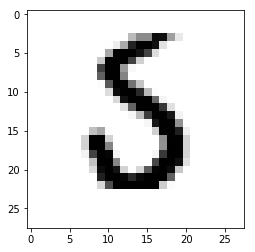

In [11]:
# query the wrongly recognized numbers
all_values = test_data_list[9941].split(',')
print("Wahrer Wert: " + all_values[0])

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

n.query((numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01)